# Diabetes Analysis

The UC Irvine's Machine Learning Data Repository Department hosts a Kaggle Competition with famous collection of data on whether a patient has diabetes (the Pima Indians dataset), originally owned by the National Institute of Diabetes and Digestive and Kidney Diseases and donated by Vincent Sigillito. 

Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

By looking at these preliminary views we can see that some columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of zero, which might need further investigation since these values might not be realistic in a biological context.


In [31]:
diabetes_data_info = diabetes_data.info()
diabetes_data_head = diabetes_data.head()
diabetes_data_description = diabetes_data.describe()

diabetes_data_info, diabetes_data_head, diabetes_data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807     

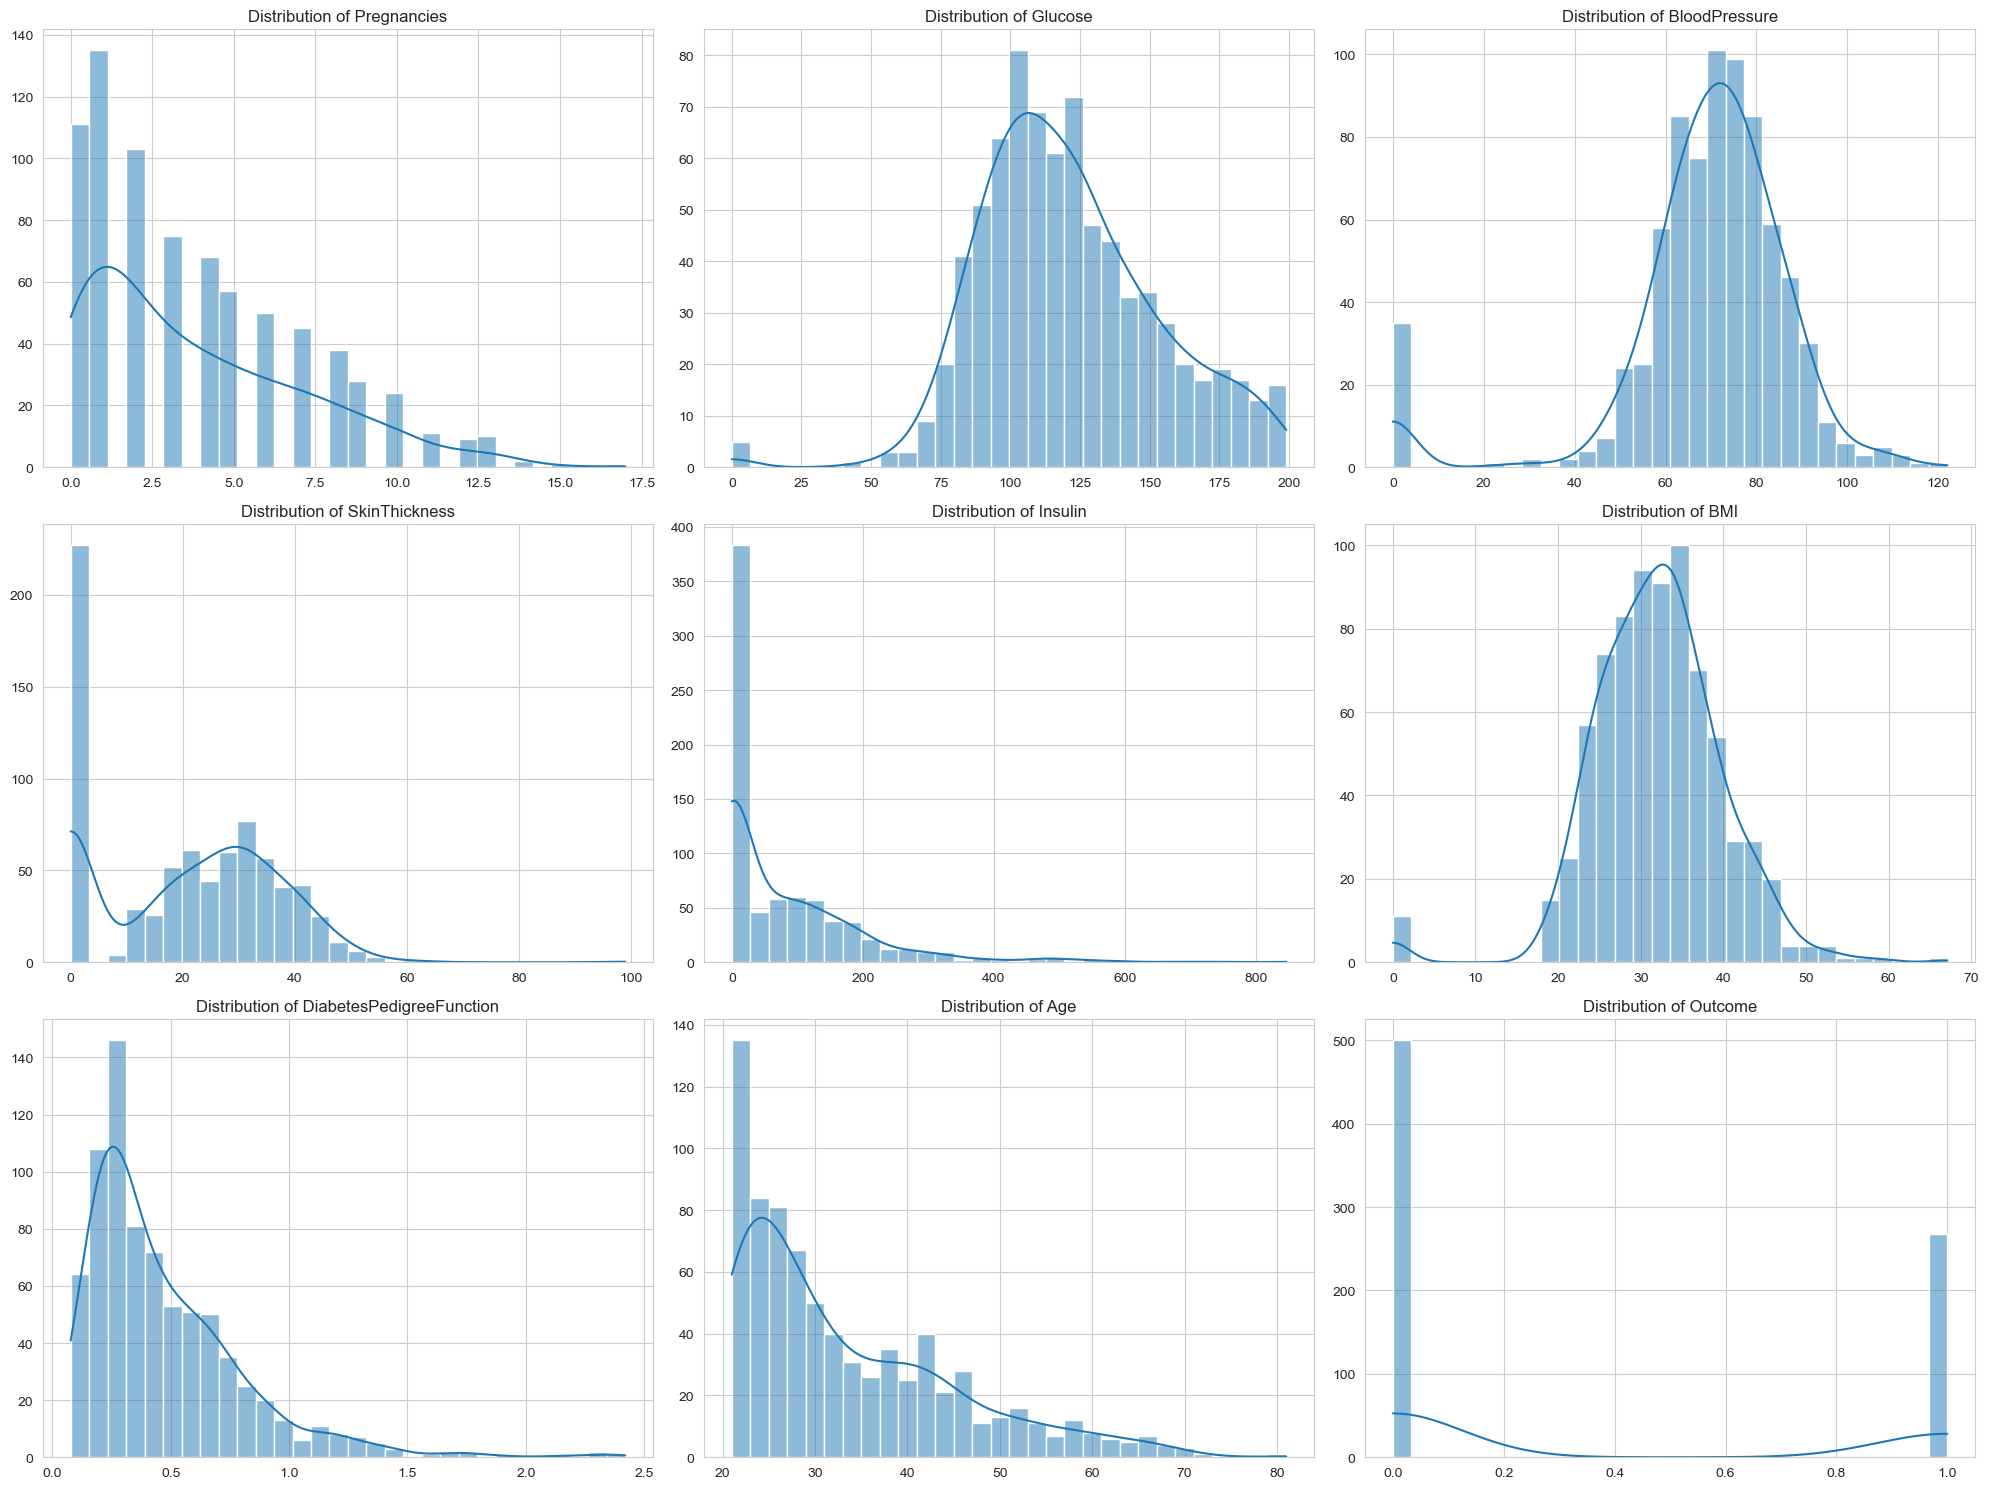

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize=(20, 15))

columns = diabetes_data.columns

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(diabetes_data[columns[i]], kde=True, bins=30)
    plt.title(f'Distribution of {columns[i]}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Handling zero values

In [34]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    median_value = diabetes_data[column].median()
    diabetes_data[column].replace(0, median_value, inplace=True)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


### Visualization

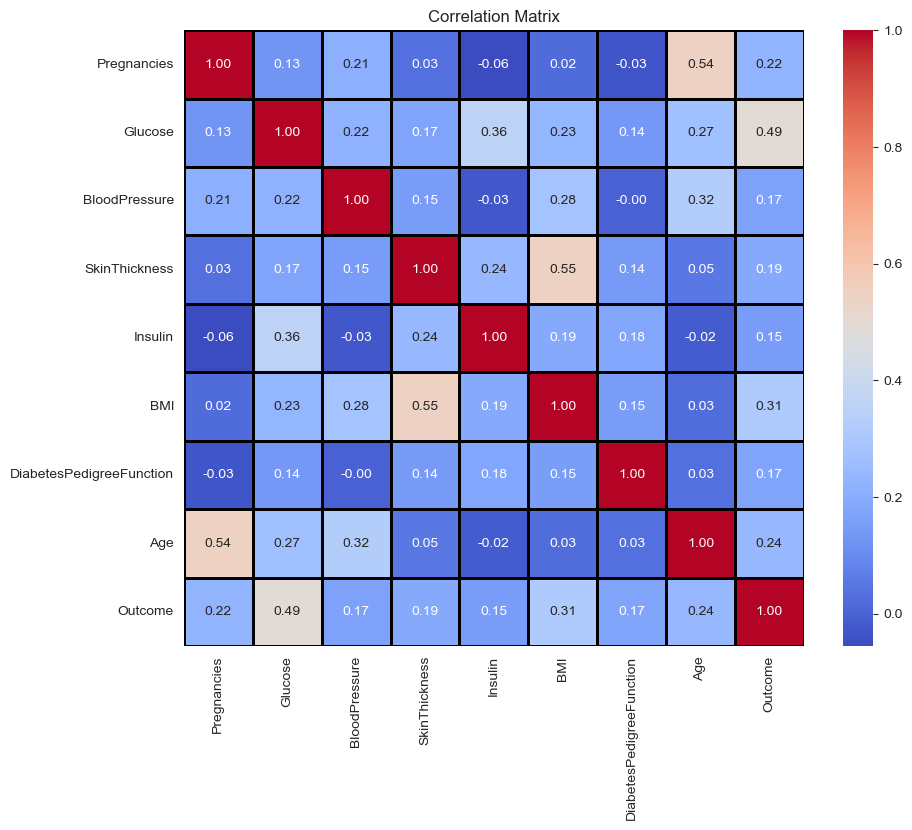

In [36]:
correlation_matrix = diabetes_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

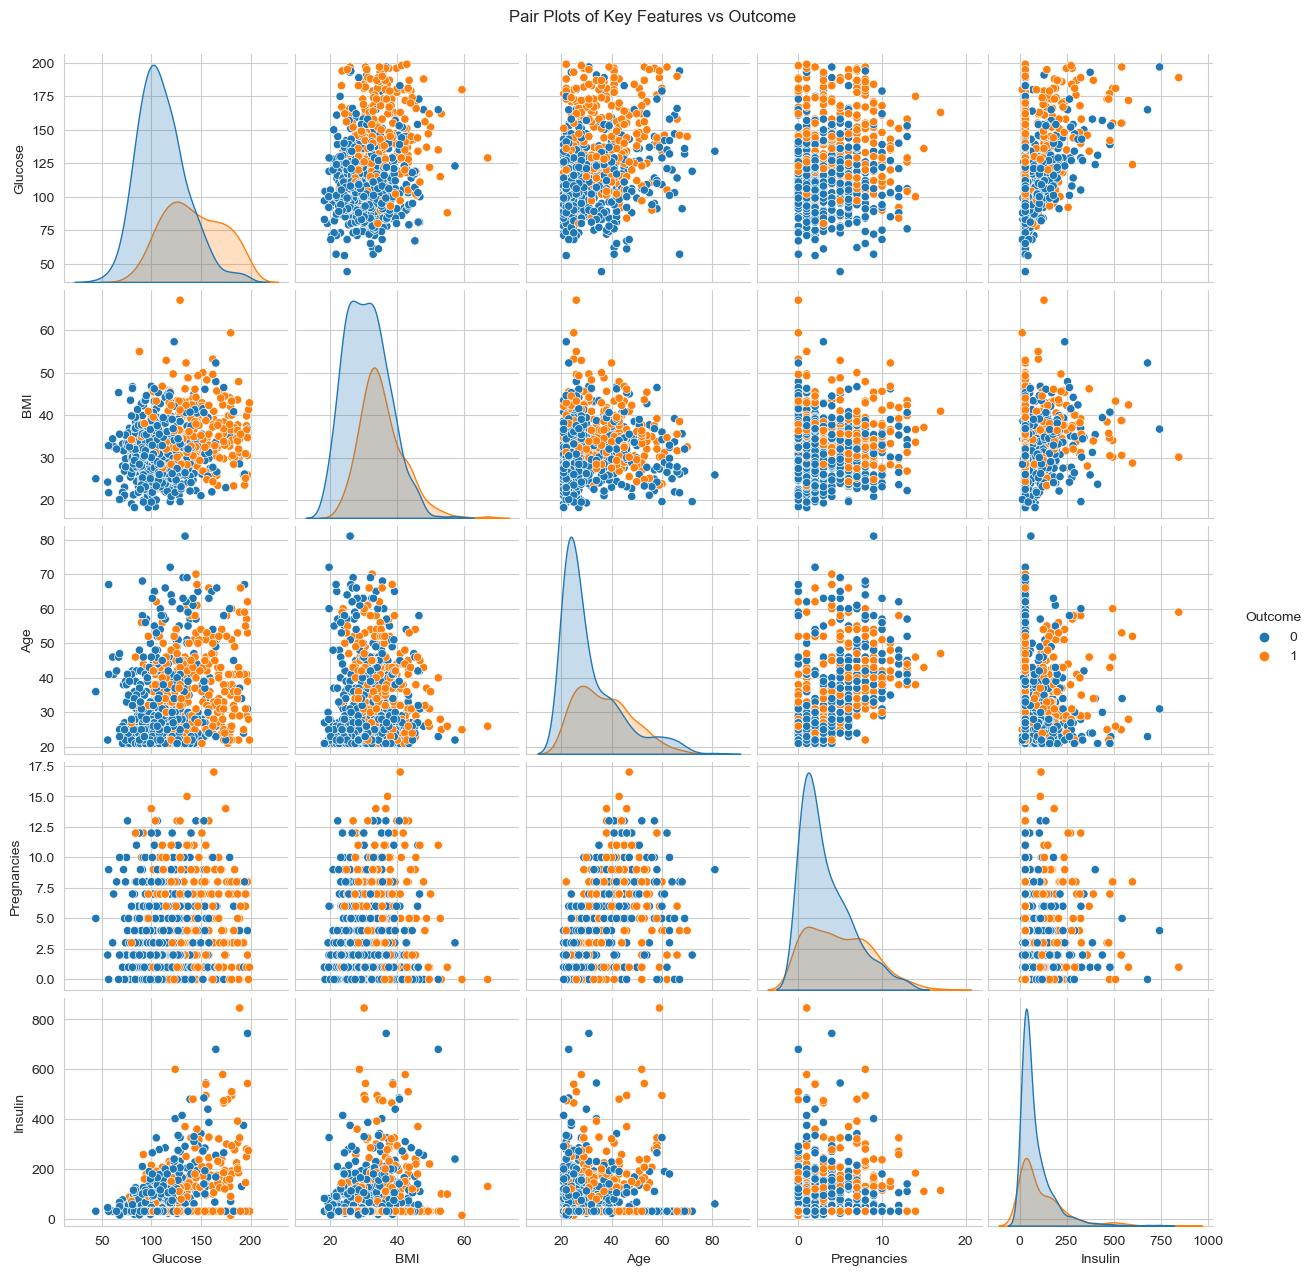

In [37]:
sns.pairplot(diabetes_data, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin'])
plt.suptitle('Pair Plots of Key Features vs Outcome', y=1.02)
plt.show()

## Feature Engineering

### Polynomial Features

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_transformer.fit_transform(diabetes_data.drop(columns=['Outcome']))
poly_features_df = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(input_features=diabetes_data.columns[:-1]))

poly_features_df.shape, poly_features_df.head()

((768, 44),
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0          6.0    148.0           72.0           35.0     30.5  33.6   
 1          1.0     85.0           66.0           29.0     30.5  26.6   
 2          8.0    183.0           64.0           23.0     30.5  23.3   
 3          1.0     89.0           66.0           23.0     94.0  28.1   
 4          0.0    137.0           40.0           35.0    168.0  43.1   
 
    DiabetesPedigreeFunction   Age  Pregnancies^2  Pregnancies Glucose  ...  \
 0                     0.627  50.0           36.0                888.0  ...   
 1                     0.351  31.0            1.0                 85.0  ...   
 2                     0.672  32.0           64.0               1464.0  ...   
 3                     0.167  21.0            1.0                 89.0  ...   
 4                     2.288  33.0            0.0                  0.0  ...   
 
    Insulin^2  Insulin BMI  Insulin DiabetesPedigreeFunction  Insulin Ag

## Model Selection

In [39]:
from sklearn.model_selection import train_test_split

X = poly_features_df
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 44), (154, 44), (614,), (154,))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

model_evaluations = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    model_evaluations[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat
    }

model_evaluations

/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.7662337662337663,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.79      0.86      0.83        99\n           1       0.70      0.60      0.65        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.73      0.74       154\nweighted avg       0.76      0.77      0.76       154\n',
  'Confusion Matrix': array([[85, 14],
         [22, 33]])},
 'Decision Tree': {'Accuracy': 0.7012987012987013,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.80      0.72      0.76        99\n           1       0.57      0.67      0.62        55\n\n    accuracy                           0.70       154\n   macro avg       0.68      0.69      0.69       154\nweighted avg       0.72      0.70      0.71       154\n',
  'Confusion Matrix': array([[71, 28],
         [18, 37]])},
 'Random Forest': {'Accuracy': 0.7467532

In [42]:
for model_name, evaluation in model_evaluations.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {evaluation['Accuracy']:.2f}")
    print("Classification Report:")
    print(evaluation['Classification Report'])
    print("Confusion Matrix:")
    print(evaluation['Confusion Matrix'])
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
[[85 14]
 [22 33]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154

Confusion Matrix:
[[71 28]
 [18 37]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.75
Classifica

## Hyperparameters (using Random Search)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from scipy.stats import randint

### Logistic Regression

In [47]:
log_reg_dist = {
    'C': loguniform(0.001, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

log_reg_random_search_reduced = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                                                  log_reg_dist, 
                                                  n_iter=10,  
                                                  cv=5, 
                                                  scoring='accuracy', 
                                                  random_state=42)

log_reg_random_search_reduced.fit(X_train, y_train)

log_reg_best_params_reduced = log_reg_random_search_reduced.best_params_
log_reg_best_score_reduced = log_reg_random_search_reduced.best_score_

log_reg_best_params_reduced, log_reg_best_score_reduced

/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roccototaro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roccototaro/o

({'C': 4.570563099801452, 'penalty': 'l1', 'solver': 'liblinear'},
 0.7606157536985206)

### Random Forest

In [50]:
rf_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                     rf_dist, 
                                     n_iter=10,  
                                     cv=5, 
                                     scoring='accuracy', 
                                     random_state=42)

rf_random_search.fit(X_train, y_train)

rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_

rf_best_params, rf_best_score

({'max_depth': 4,
  'min_samples_leaf': 8,
  'min_samples_split': 4,
  'n_estimators': 249},
 0.7703985072637611)

In [51]:
best_log_reg_model = log_reg_random_search_reduced.best_estimator_
log_reg_test_predictions = best_log_reg_model.predict(X_test)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_predictions)
log_reg_test_classification_report = classification_report(y_test, log_reg_test_predictions)

best_rf_model = rf_random_search.best_estimator_
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_classification_report = classification_report(y_test, rf_test_predictions)

log_reg_test_accuracy, log_reg_test_classification_report, rf_test_accuracy, rf_test_classification_report

(0.7402597402597403,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.80        99\n           1       0.63      0.65      0.64        55\n\n    accuracy                           0.74       154\n   macro avg       0.72      0.72      0.72       154\nweighted avg       0.74      0.74      0.74       154\n',
 0.7597402597402597,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82        99\n           1       0.67      0.64      0.65        55\n\n    accuracy                           0.76       154\n   macro avg       0.74      0.73      0.74       154\nweighted avg       0.76      0.76      0.76       154\n')

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

log_reg_cv_scores = cross_val_score(best_log_reg_model, X, y, cv=5, scoring='accuracy')

rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

log_reg_cv_mean = log_reg_cv_scores.mean()
log_reg_cv_std = log_reg_cv_scores.std()
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

log_reg_cv_mean, log_reg_cv_std, rf_cv_mean, rf_cv_std

(0.7617859264918088,
 0.023552198341123806,
 0.7617944147355912,
 0.030154461844438468)